In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mean_hoi = pd.read_csv('../../24_nodes_data/concatenated_meanhoi_all_24.csv')
all_variances = pd.read_csv('../../24_nodes_data/allvariances_24.csv')

In [8]:
laconeu_dmcgo_contextdm1_24_contextdm1_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_contextdm1_24_contextdm1_8.csv')
laconeu_dmcgo_contextdm1_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_contextdm1_24_dmcgo_8.csv')
laconeu_dmcgo_contextdm2_24_contextdm2_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_contextdm2_24_contextdm2_8.csv')
laconeu_dmcgo_contextdm2_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_contextdm2_24_dmcgo_8.csv')
laconeu_dmcgo_dm1_24_dm1_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dm1_24_dm1_8.csv')
laconeu_dmcgo_dm1_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dm1_24_dmcgo_8.csv')
laconeu_dmcgo_dm2_24_dm2_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dm2_24_dm2_8.csv')
laconeu_dmcgo_dm2_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dm2_24_dmcgo_8.csv')
laconeu_dmcgo_dmcnogo_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dmcnogo_24_dmcgo_8.csv')
laconeu_dmcgo_dmcnogo_24_dmcnogo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_dmcnogo_24_dmcnogo_8.csv')
laconeu_dmcgo_multidm_24_dmcgo_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_multidm_24_dmcgo_8.csv')
laconeu_dmcgo_multidm_24_multidm_8= pd.read_csv('../../24_nodes_data/full_dfs/Models/laconeu_dmcgo_multidm_24_multidm_8.csv')

In [36]:
models = ['laconeu_dmcgo_contextdm1_24', 'laconeu_dmcgo_contextdm2_24', 'laconeu_dmcgo_dm1_24', 
          'laconeu_dmcgo_dm2_24', 'laconeu_dmcgo_dmcnogo_24', 'laconeu_dmcgo_multidm_24']

all_tasks = [ ('contextdm1', 'dmcgo'), ('contextdm2', 'dmcgo'), ('dm1', 'dmcgo'), ('dm2', 'dmcgo'), ('dmcnogo', 'dmcgo'), ('multidm', 'dmcgo')]

nplet_data_folder = [('laconeu_dmcgo_contextdm1_24_contextdm1_8', 'laconeu_dmcgo_contextdm1_24_dmcgo_8'),
                     ('laconeu_dmcgo_contextdm2_24_contextdm2_8', 'laconeu_dmcgo_contextdm2_24_dmcgo_8'),
                    ('laconeu_dmcgo_dm1_24_dm1_8', 'laconeu_dmcgo_dm1_24_dmcgo_8'), 
                    ('laconeu_dmcgo_dm2_24_dm2_8', 'laconeu_dmcgo_dm2_24_dmcgo_8'), 
                    ('laconeu_dmcgo_dmcnogo_24_dmcgo_8', 'laconeu_dmcgo_dmcnogo_24_dmcnogo_8'),
                    ('laconeu_dmcgo_multidm_24_dmcgo_8', 'laconeu_dmcgo_multidm_24_multidm_8')]



In [26]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [33]:
def histogram(variances_model, model, tasks):
    #Histogram of the FTV values

    # 1) Identify the node columns (e.g. n0..n23)
    node_cols = [col for col in variances_model.columns if col.startswith('n')]

    # 2) Flatten all node variances into a single numpy array
    #    This gathers the variances for *all* rows & *all* node columns
    all_var_values = variances_model[node_cols].to_numpy().flatten()


    plt.figure(figsize=(8, 6))
    plt.hist(all_var_values, bins=10, alpha=0.7, color='steelblue')
    plt.xlabel('FTV')
    plt.ylabel('Count')
    plt.title(f'FTV for model trained on {tasks}')
    plt.show()

In [22]:
def get_mean_std_variance(row, df_nplet, all_variances_df):
    """
    Given a single row of df_nplet and references to the full df_nplet and all_variances_df:
      1) Identify which var_* columns are True (these are the neurons in the n-plet).
      2) Match on 'model' (and 'task', if needed) in all_variances_df.
      3) Extract the absolute variance values for those neurons (n0..n23).
      4) Return BOTH the mean and the std of those absolute variances.
    """

    # Identify the columns that start with 'var_'
    var_cols = [col for col in df_nplet.columns if col.startswith('var_')]

    # Match the row in all_variances_df (adjust logic as needed)
    matching_rows = all_variances_df[
        (all_variances_df['model'] == row['model'])
        &
        (
            (all_variances_df['task1'] == row['task'])
            | (all_variances_df['task2'] == row['task'])
        )
    ]
    
    # If not exactly one match, return NaN
    if len(matching_rows) != 1:
        return pd.Series([np.nan, np.nan], index=["mean_variance", "std_variance"])
    
    match = matching_rows.iloc[0]

    # Which neurons are True in this row? (var_0..var_XX)
    neuron_indices = [
        int(c.split('_')[1])
        for c in var_cols
        if row[c] is True
    ]


    # Get the absolute variances for these neurons (for mean)
    variances_abs = [abs(match[f'n{i}']) for i in neuron_indices]
    
    # Get the raw (signed) variances (for std)
    variances_raw = [match[f'n{i}'] for i in neuron_indices]

    # Compute mean of absolute value
    mean_val = np.mean(variances_abs)

    # Compute std of the raw value
    std_val = np.std(variances_raw)
    
    #Compute CV
    cv = std_val / np.mean(variances_raw)

    # Return both, with explicit index so we know which is which
    return pd.Series([mean_val, std_val, cv], index=["mean_variance", "std_variance", "cv"])


def add_mean_var_df(df):

    
    df[["mean_variance", "std_variance", "cv"]] = df.apply(
    get_mean_std_variance,
    axis=1,
    result_type="expand",  # Ensures the returned Series is expanded into columns
    args=(df, all_variances)  # Additional arguments
    )
    return df
    

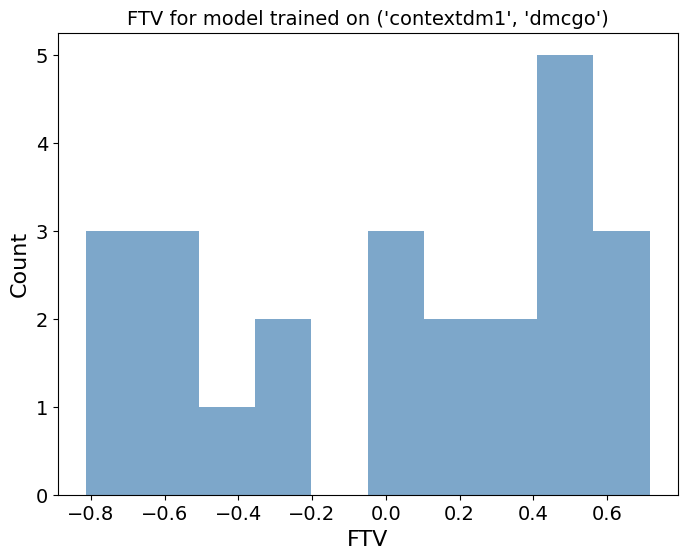

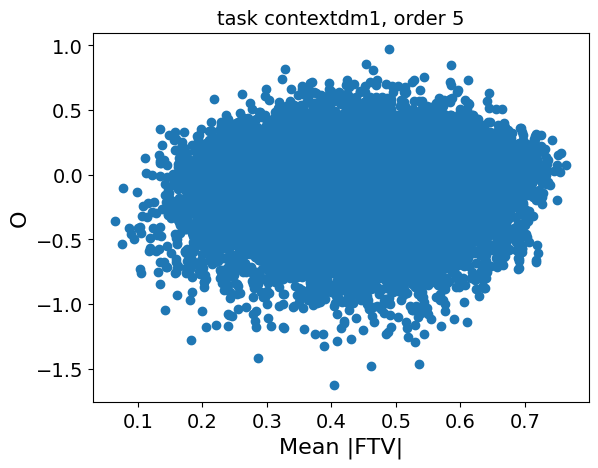

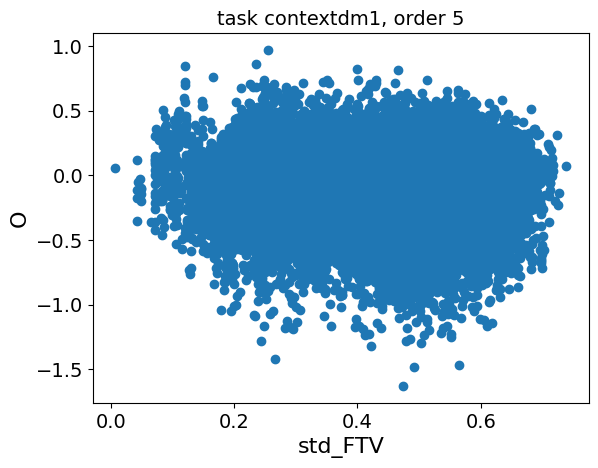

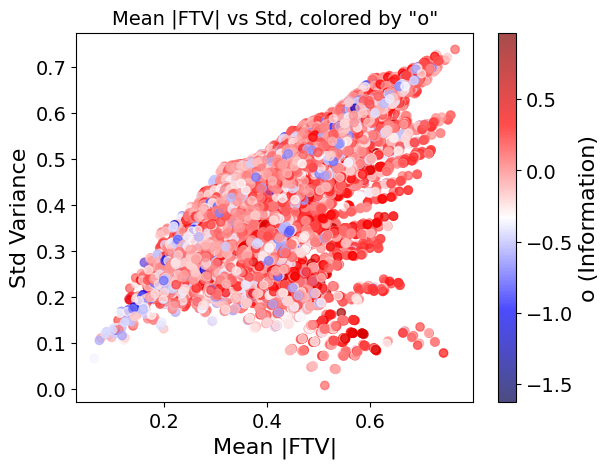

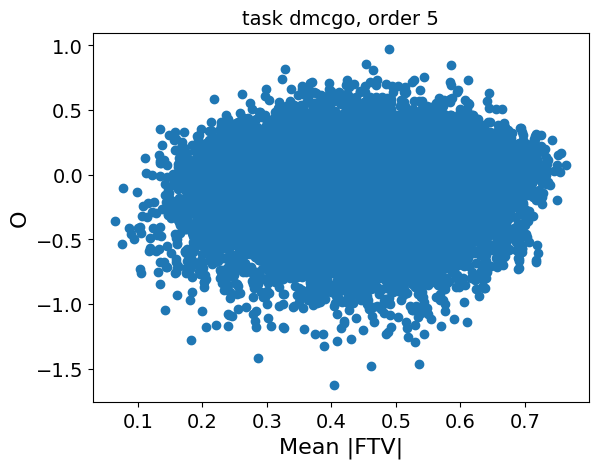

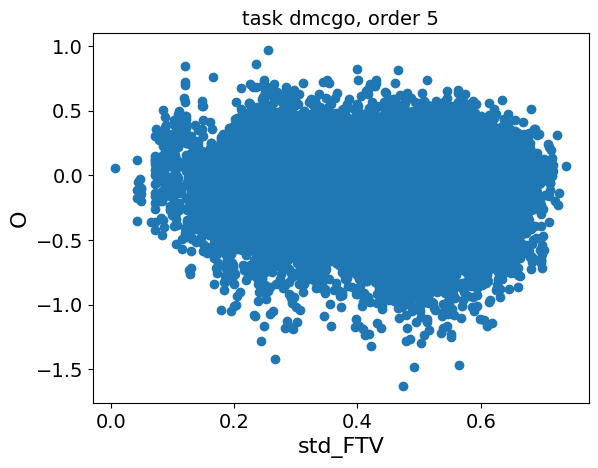

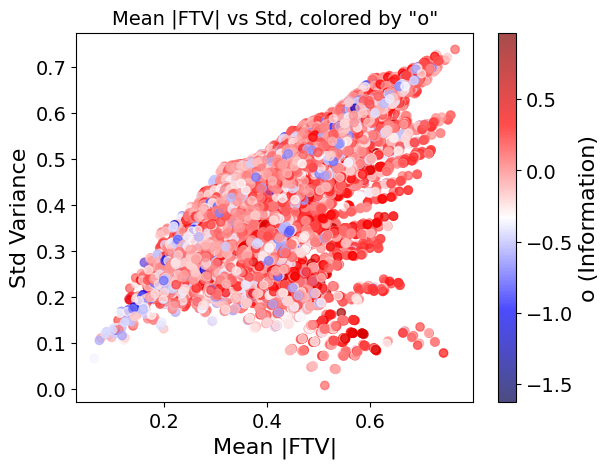

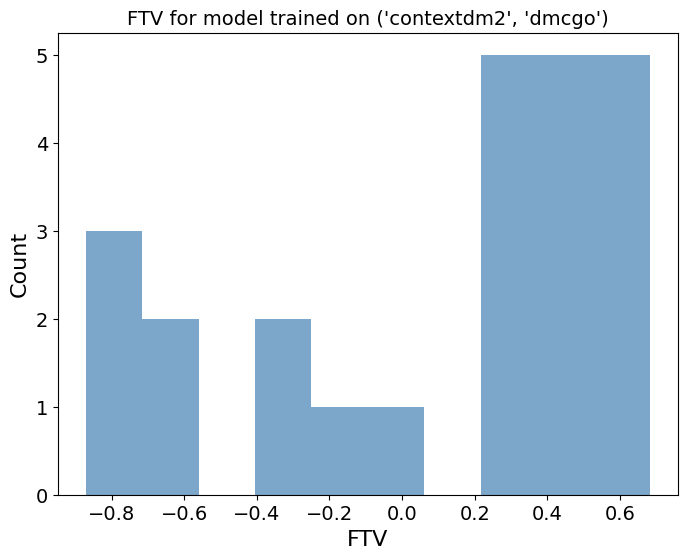

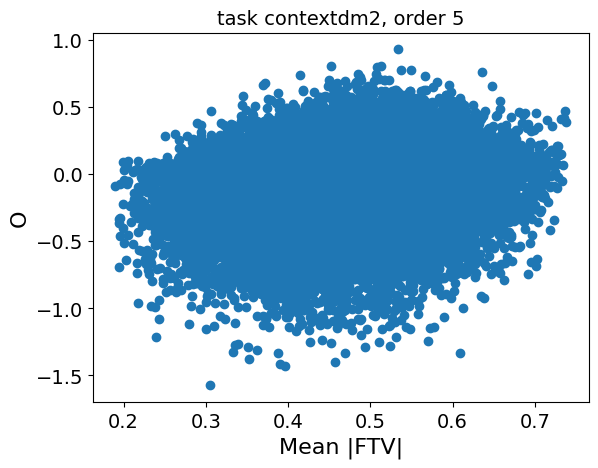

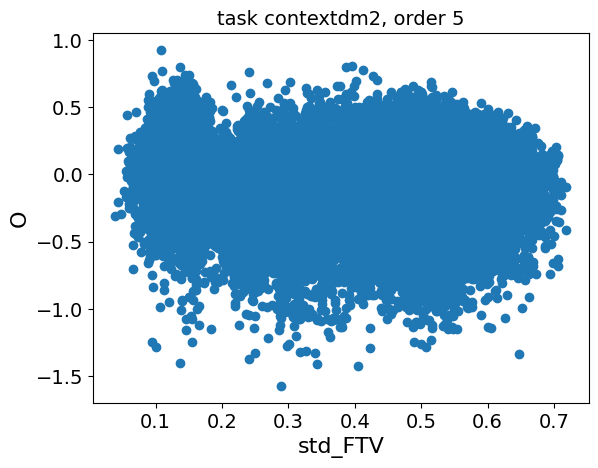

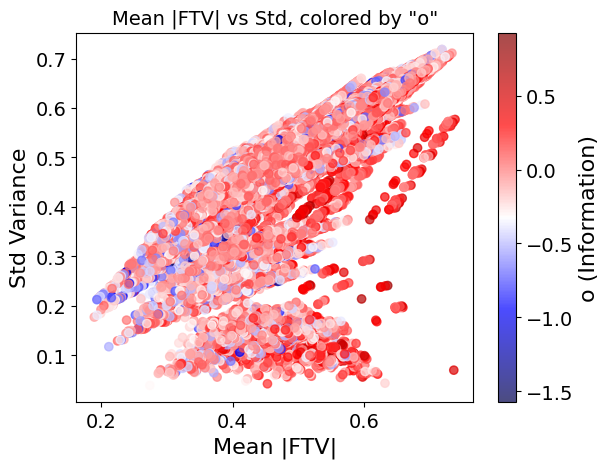

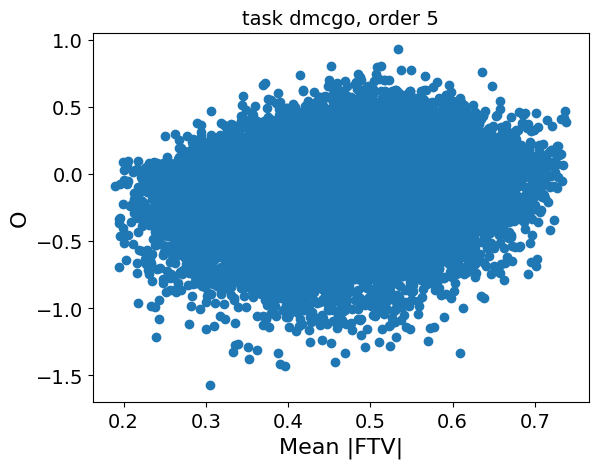

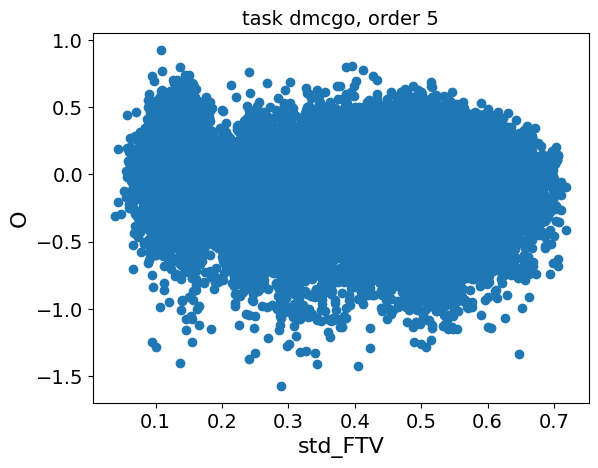

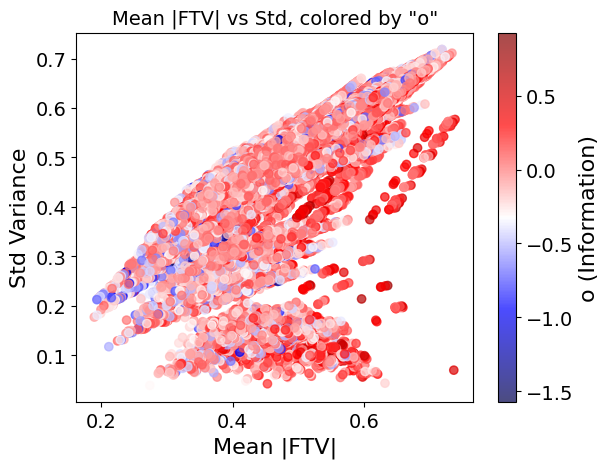

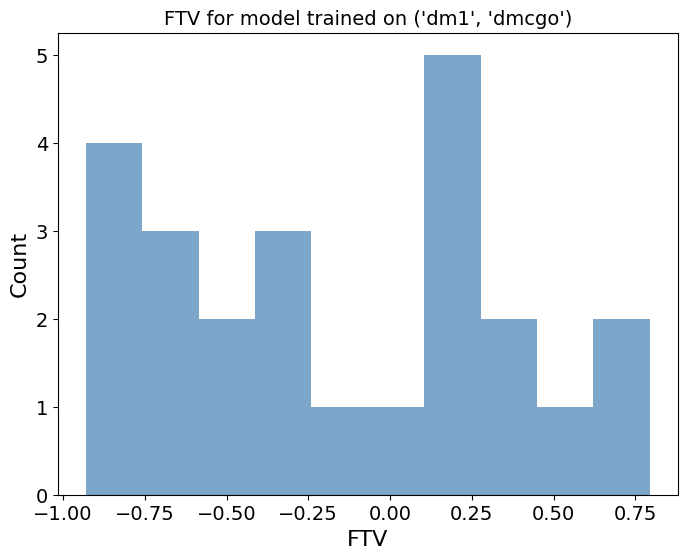

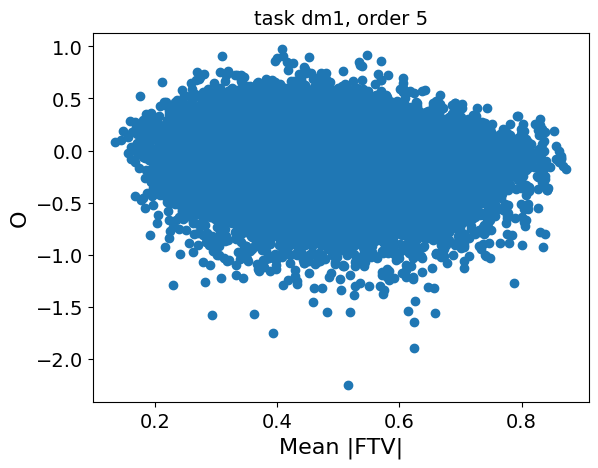

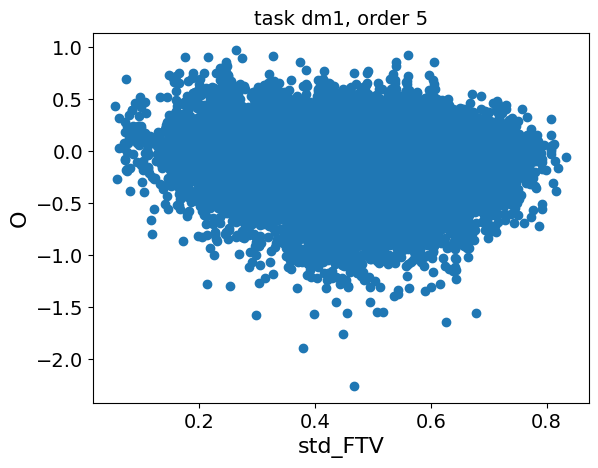

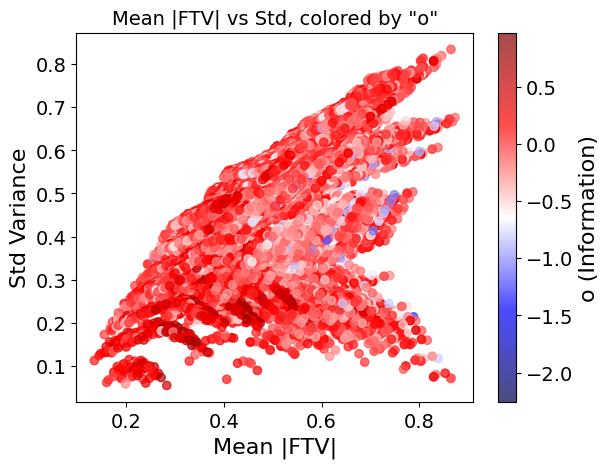

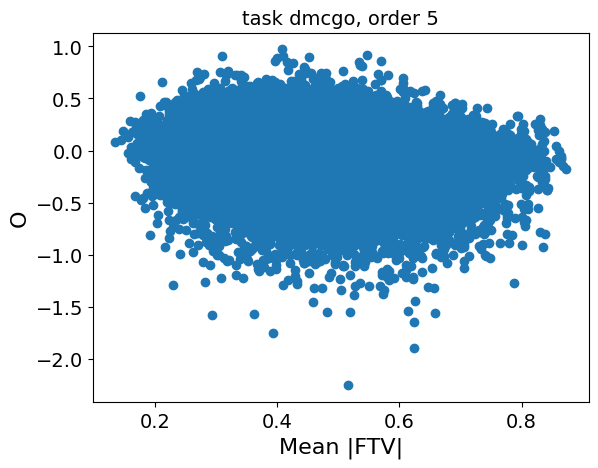

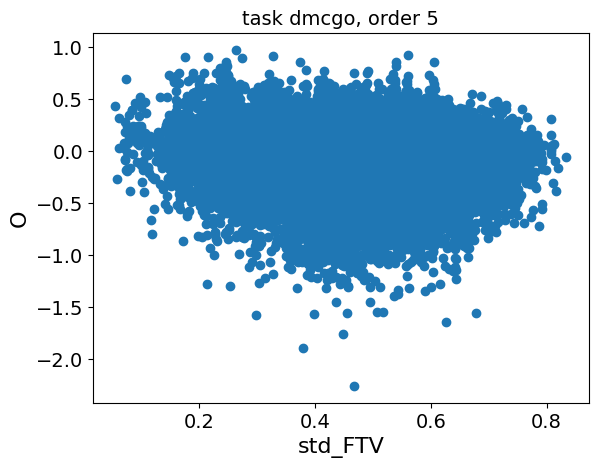

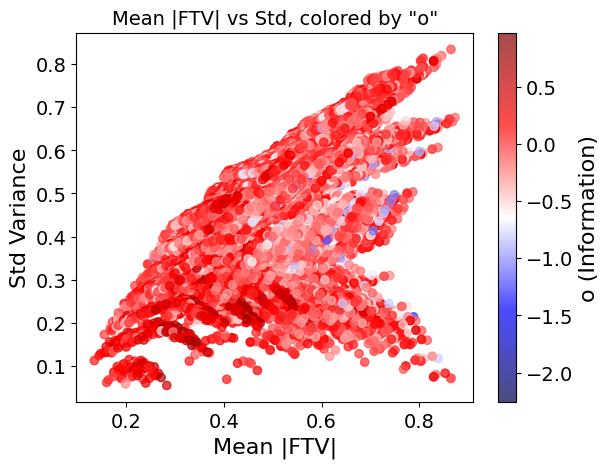

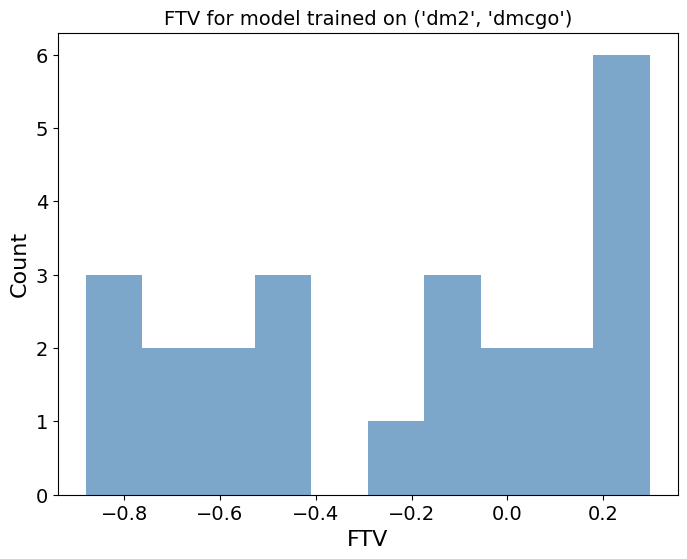

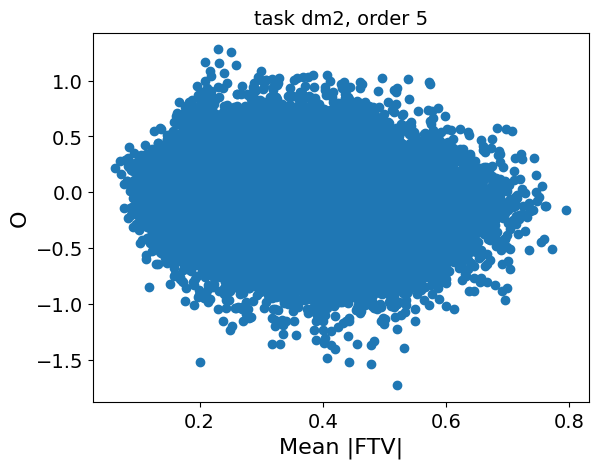

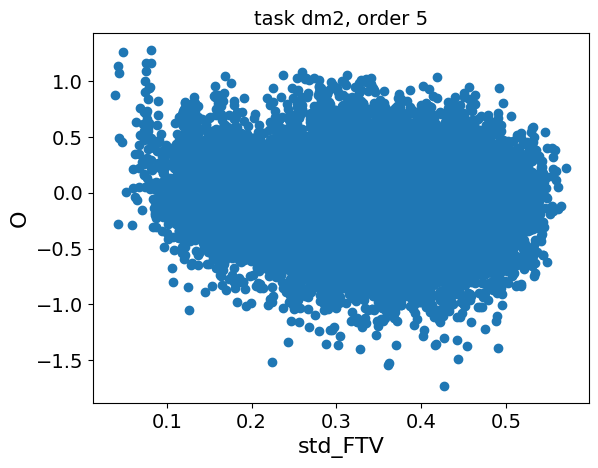

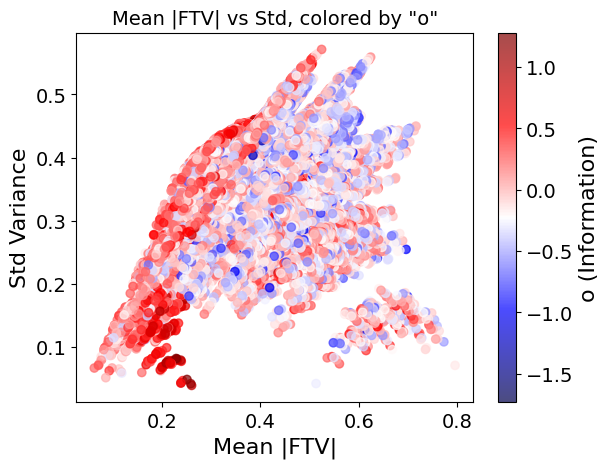

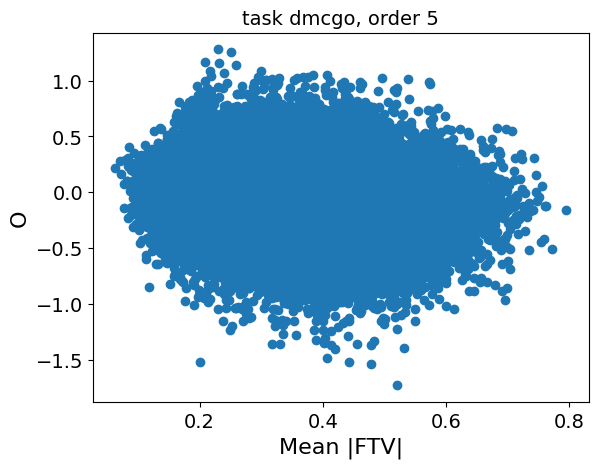

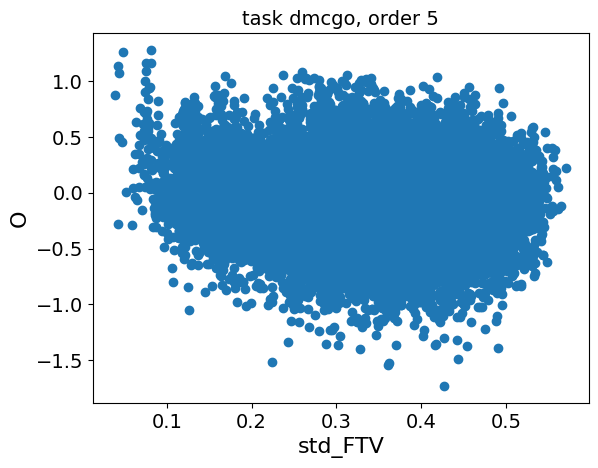

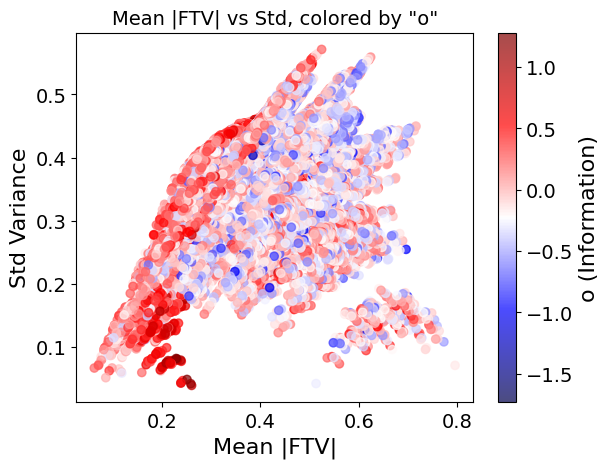

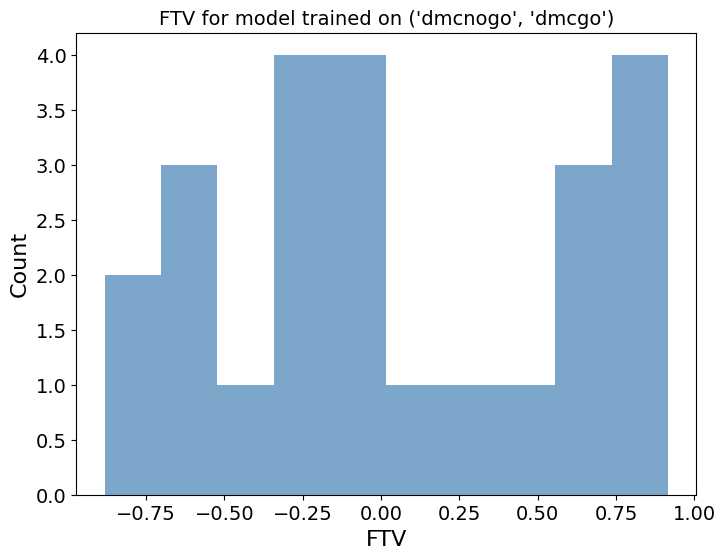

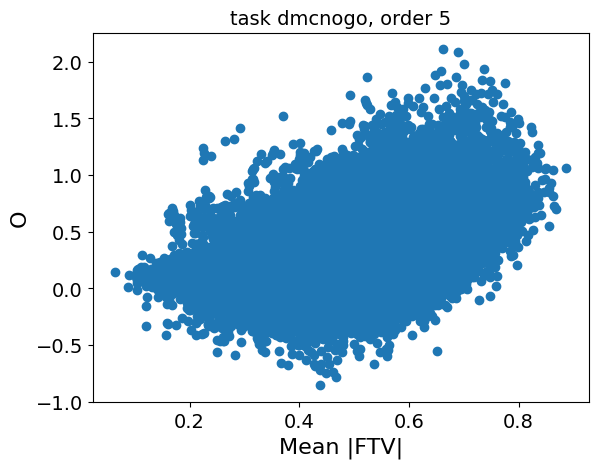

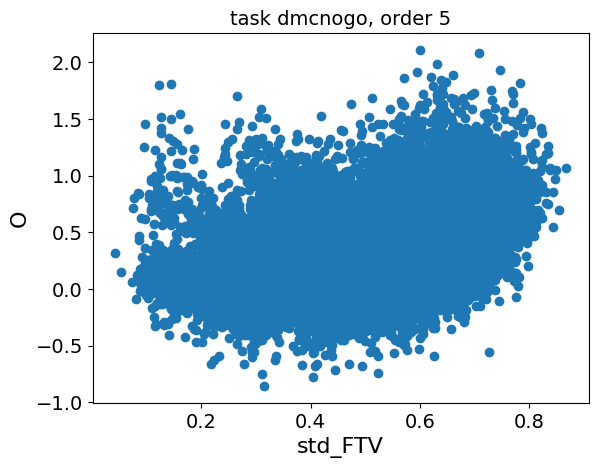

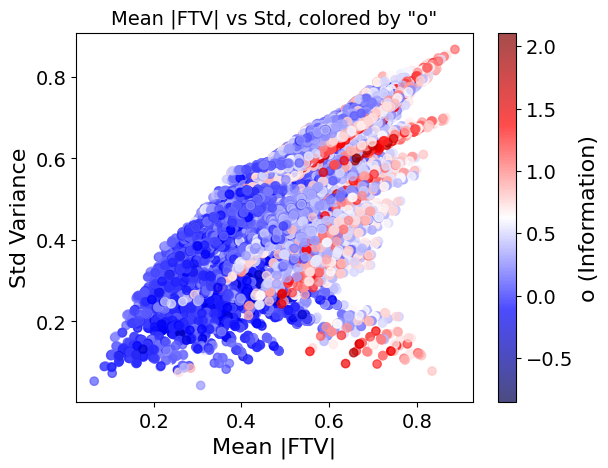

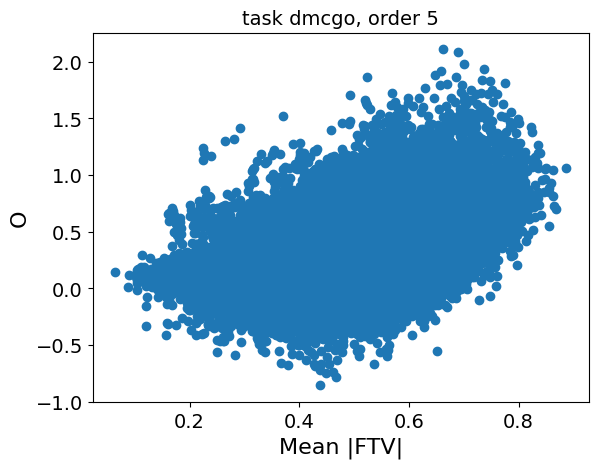

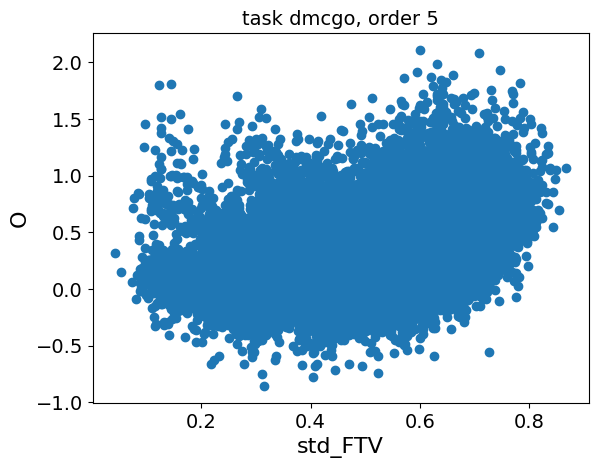

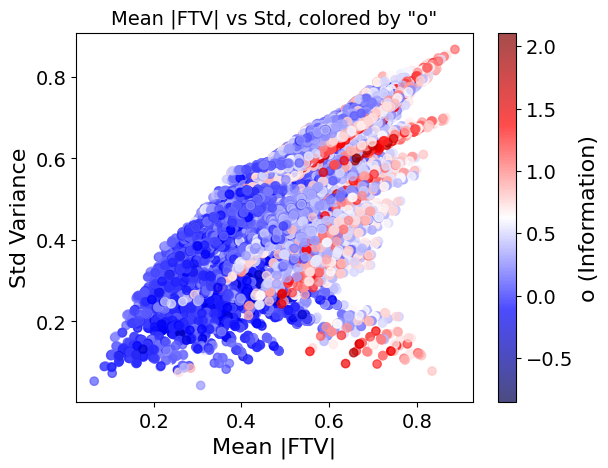

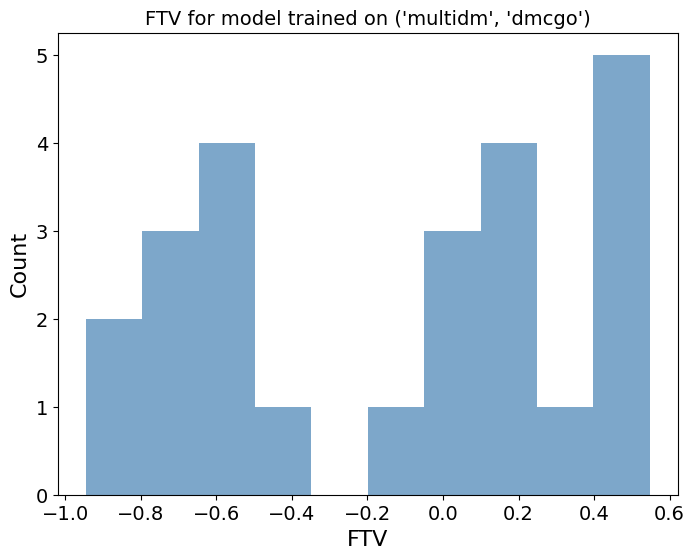

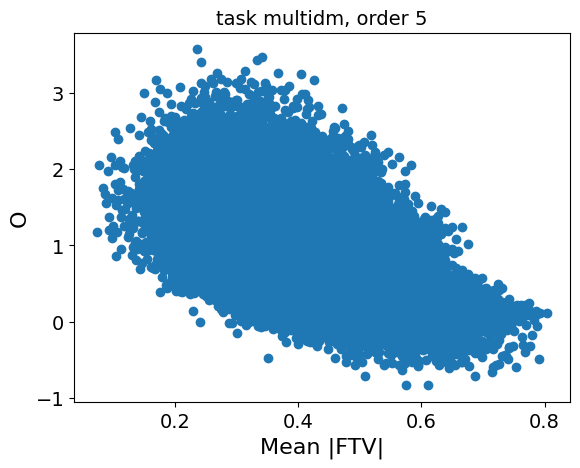

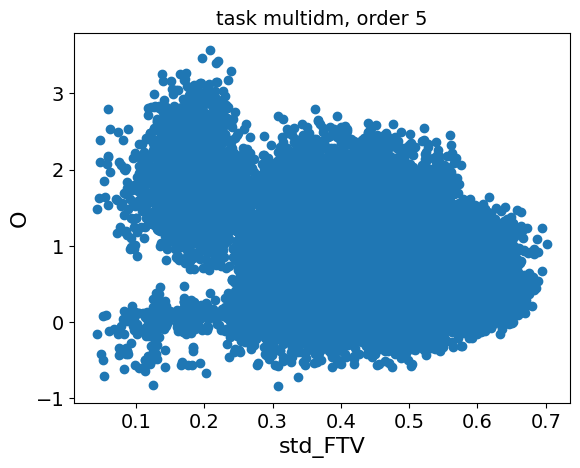

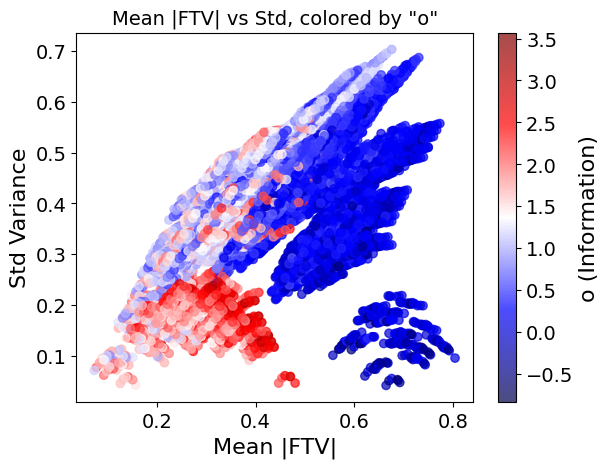

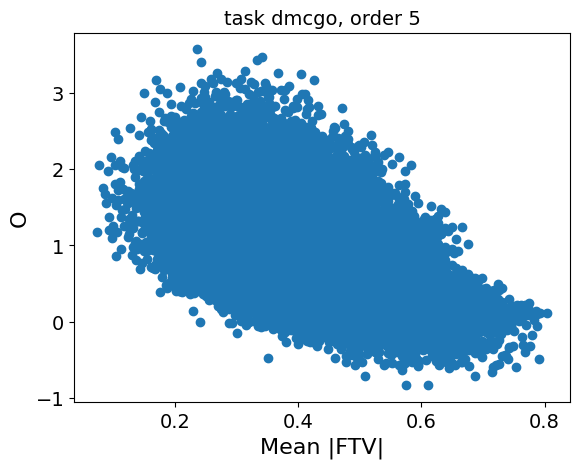

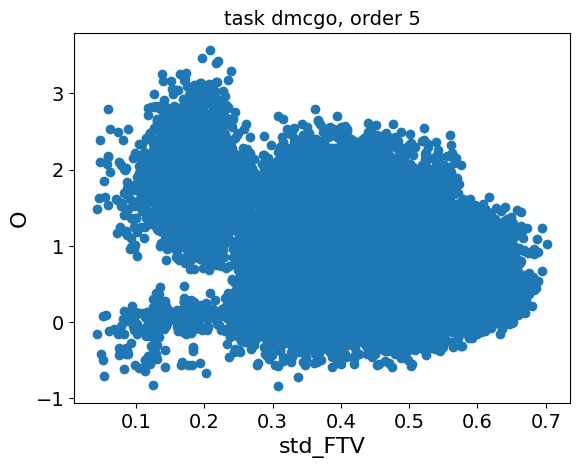

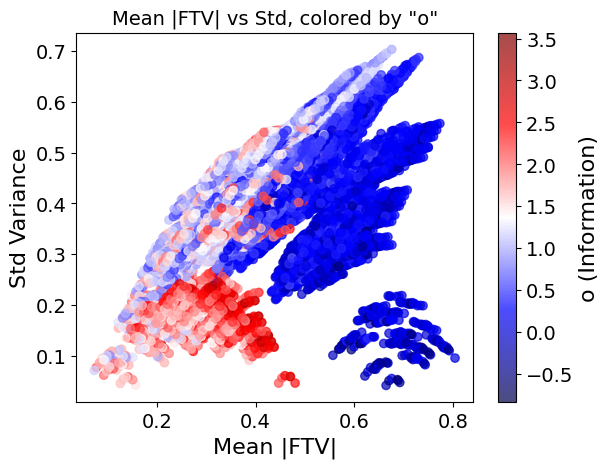

In [41]:
order = 5
for i in range(len(models)):
    model = models[i]
    tasks = all_tasks[i]
    folders = nplet_data_folder[i]

    variances_model = all_variances[all_variances['model'] == model]

    histogram(variances_model, model, tasks)

    for i in tasks:
        df_task= pd.read_csv(f'../../24_nodes_data/full_dfs/Models/{folders[0]}.csv')
        df_task = df_task[df_task['order'] == order]
        df_task= add_mean_var_df(df_task)
        
        plt.scatter(df_task['mean_variance'], df_task['o'])
        plt.xlabel('Mean |FTV|')
        plt.ylabel('O')
        plt.title(f'task {i}, order {order}')
        plt.show()
        
        plt.scatter(df_task['std_variance'], df_task['o'])
        plt.xlabel('std_FTV')
        plt.ylabel('O')
        plt.title(f'task {i}, order {order}')
        plt.show()
        
        # Create a scatter plot, color-coded by the 'o' column
        scatter = plt.scatter(
        df_task['mean_variance'],
        df_task['std_variance'],
        c=df_task['o'],            # color by "o"
        cmap='seismic',                         # or another colormap
        alpha=0.7
    )

        # Add a colorbar showing the scale of "o"
        cbar = plt.colorbar(scatter)
        cbar.set_label('o (Information)')

        # Label the axes
        plt.xlabel('Mean |FTV|')
        plt.ylabel('Std Variance')
        plt.title('Mean |FTV| vs Std, colored by "o"')

        plt.show()


